In [1]:
import os 

for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd

./input/titanic.zip
./input/gender_submission.csv
./input/test.csv
./input/train.csv
./input/titanic.zip:Zone.Identifier


In [2]:
train =pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
gender_submission = pd.read_csv('./input/gender_submission.csv')

In [3]:
data = pd.concat([train,test],sort = False)
data['Sex']=data['Sex'].replace(['male','female'],[0,1])
#male,femaleを０１に変換

/tmp/ipykernel_177377/3092714075.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex']=data['Sex'].replace(['male','female'],[0,1])


In [4]:
data['Fare']=data['Fare'].fillna(np.mean(data['Fare']))
data['Embarked']= data['Embarked'].fillna('S').map({'S':0,'C':1,'Q':2}).astype(int)
age_ave = data['Age'].mean()
age_std = data['Age'].std()
data['Age'] = data['Age'].fillna(data['Age'].median())
#欠損値を中央値で補完,再現性が重要

<Axes: xlabel='FamilySize', ylabel='count'>

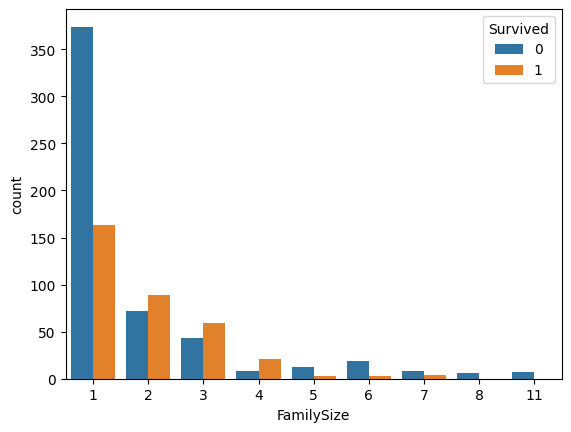

In [5]:
import seaborn as sns


data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data = train, hue='Survived')

In [ ]:
#はじめに新しい列＝０を作成が基本
data['IsAlone'] = 0
#.loc[行の条件, 列名] =値が基本形
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [6]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data = data.drop(delete_columns, axis=1)
#いらない特徴量を消す

In [9]:
train = data[:len(train)]
test = data[len(train):]
#行数で分離

In [10]:
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)
#最終結果だけ分離

In [13]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#random_stateでseed値を固定して再現性確保

/home/naoki/miniforge3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
#テンプレを読み込む
sub = pd.read_csv('./input/gender_submission.csv')
#予測結果を整数のリストに変換しテンプレのsuvivedと置き換える
sub['Survived'] = list(map(int, y_pred))
#to_csvでファイルとして出力、indexを消す
sub.to_csv('submission.csv', index=False)